In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df["date"] = pd.to_datetime(df["date"])



In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
#clean the data
df[(df['value'] >= (df['value'].quantile(0.025))) & (df['value'] <= (df['value'].quantile(0.025)))] 



,date,value


Text(0, 0.5, 'Page Views')

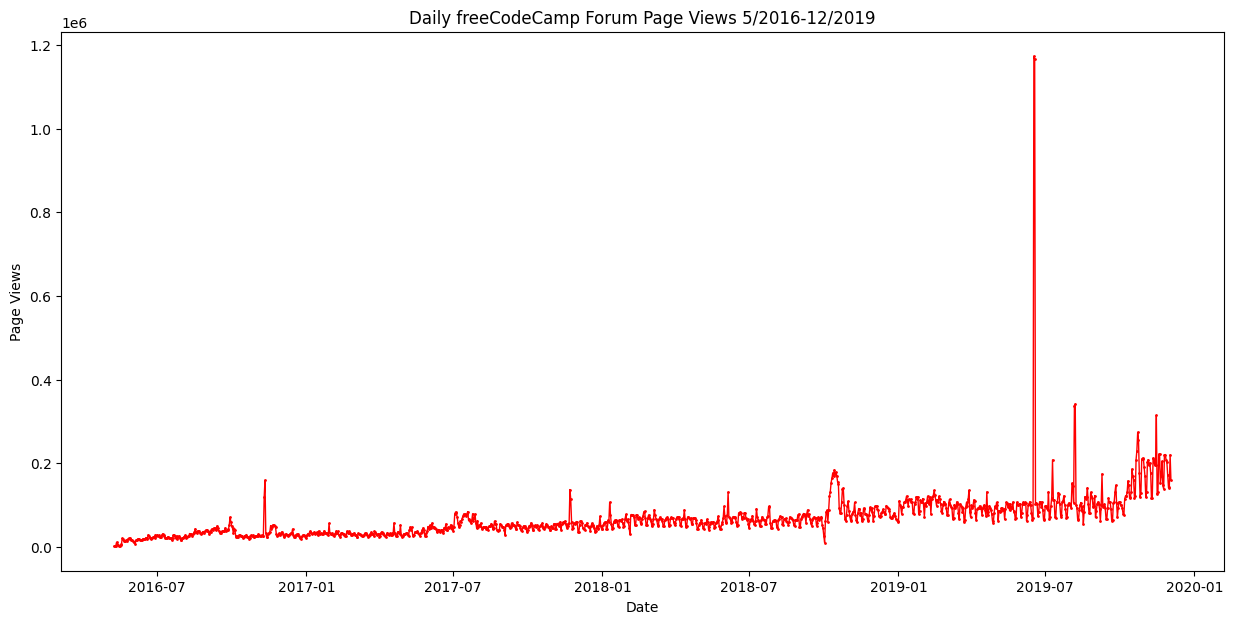

In [5]:
#plot first graph
ypoints = np.array(df['value'])
plt.figure(figsize=(15,7))

plt.plot_date(x=df["date"], y=ypoints, color = 'r', linestyle="solid", linewidth=1, markersize=1)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontdict=None, loc='center')

plt.xlabel('Date')
plt.ylabel('Page Views')

In [6]:
import datetime as dt
#prepare data. Here we group the mean number of views per month per year
df_bar = df.copy()
df_bar.reset_index(inplace=True)
#caprsint the date time objects and sorting teh months and columns
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%b') for d in df_bar.date]
df_bar["num"]=[d.month for d in df_bar.date]

#grouping teh dataframe
new_df =df_bar.groupby(["year", "month","num"])["value"].mean().to_frame(name = 'count').reset_index()




In [7]:
#sorting the months
sorted_df = new_df.sort_values(by=['num'], ascending=True)
sorted_df.head()

,year,month,num,count
12,2017,Jan,1,32785.161290
24,2018,Jan,1,58580.096774
36,2019,Jan,1,102056.516129
11,2017,Feb,2,31113.071429
35,2019,Feb,2,105968.357143


In [8]:
sorted_df.drop("num", axis=1, inplace=True)

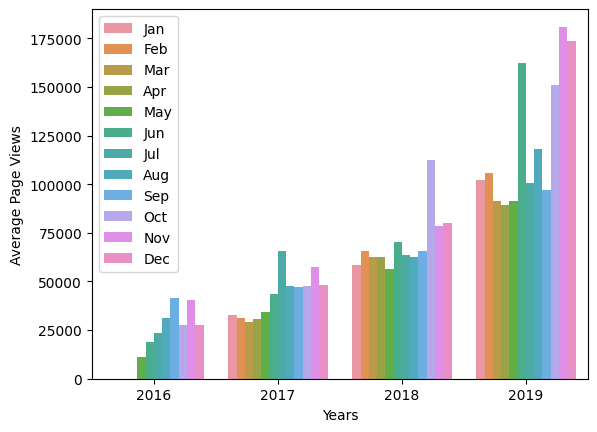

In [9]:
sns.barplot(data=sorted_df, x=sorted_df["year"], y=sorted_df["count"], hue=sorted_df["month"])
plt.ylabel("Average Page Views")
plt.xlabel("Years")
plt.legend()

iews.
Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

Text(0.5, 1.0, 'Month wise Box Plot (Seasonality)')

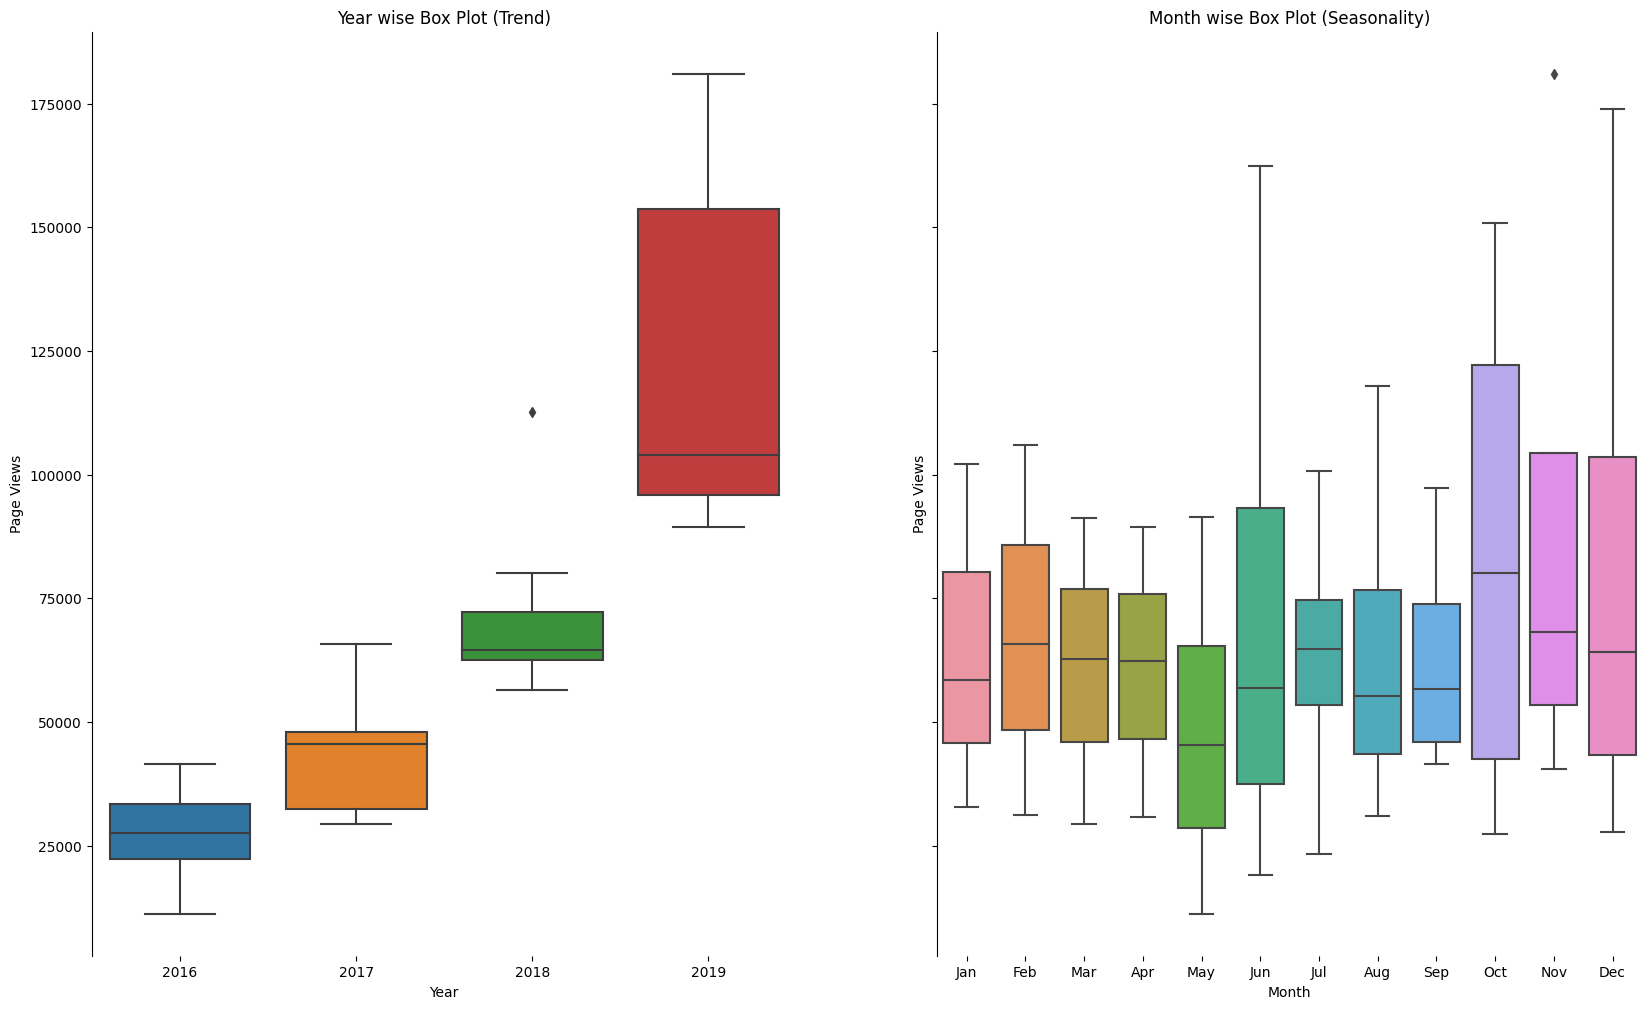

In [15]:
sorted_df.rename(columns={'month': 'Month', 'year': 'Year', "count": "Page Views"}, inplace=True)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,12))
axes[0].set_title("Year wise Box Plot (Trend)")
sns.boxplot(ax=axes[0], data=sorted_df, x='Year', y='Page Views')
sns.boxplot(ax=axes[1], data=sorted_df, x='Month', y='Page Views')
sns.despine()
sns.despine(bottom=True)

axes[1].set_title("Month wise Box Plot (Seasonality)")

